In [2]:
import seaborn as sns

In [3]:
## basic plotting with seaborn
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


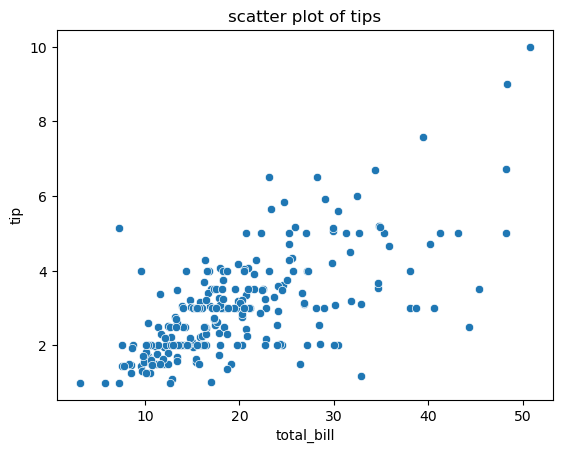

In [4]:
# create a scatter plot
import matplotlib.pyplot as plt
sns.scatterplot(x='total_bill',y='tip',data=tips)
plt.title("scatter plot of tips")
plt.show()

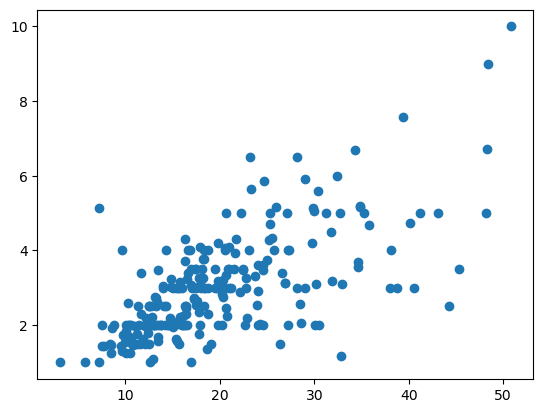

In [5]:
plt.scatter(x='total_bill',y='tip',data=tips)
plt.show()

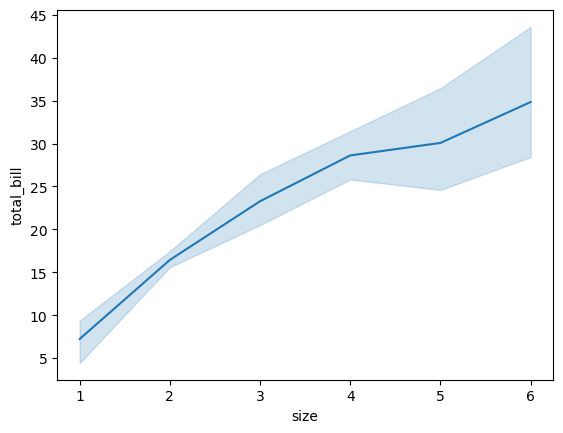

In [6]:
## line plot
sns.lineplot(x='size',y='total_bill',data=tips)
plt.show()

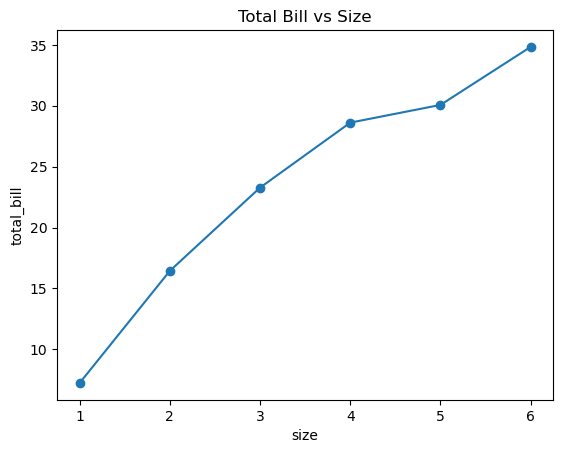

In [7]:
x = tips['size']
y = tips['total_bill']
mean_bill = tips.groupby('size')['total_bill'].mean()
plt.plot(mean_bill.index, mean_bill.values, marker='o')
plt.xlabel('size')
plt.ylabel('total_bill')
plt.title('Total Bill vs Size')
plt.show()


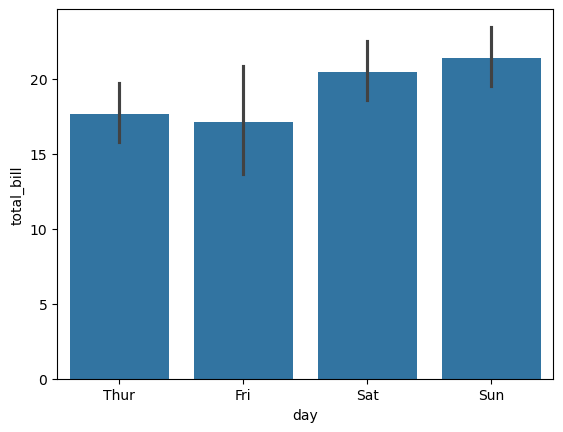

In [8]:
sns.barplot(x='day',y='total_bill',data=tips)
plt.show()

/tmp/ipykernel_4045/4194005530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bill = tips.groupby('day')['total_bill'].mean()


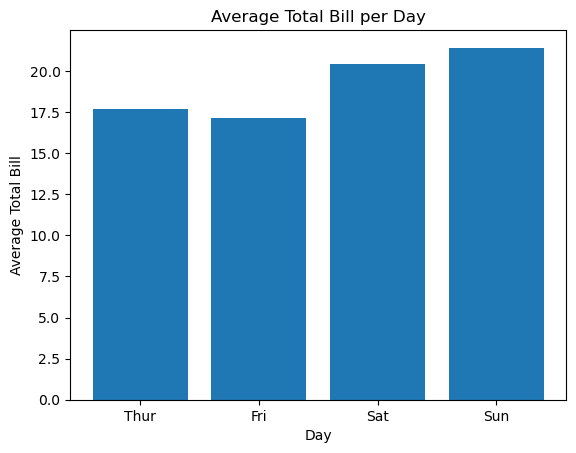

In [9]:
mean_bill = tips.groupby('day')['total_bill'].mean()
plt.bar(mean_bill.index, mean_bill.values)
plt.xlabel('Day')
plt.ylabel('Average Total Bill')
plt.title('Average Total Bill per Day')
plt.show()


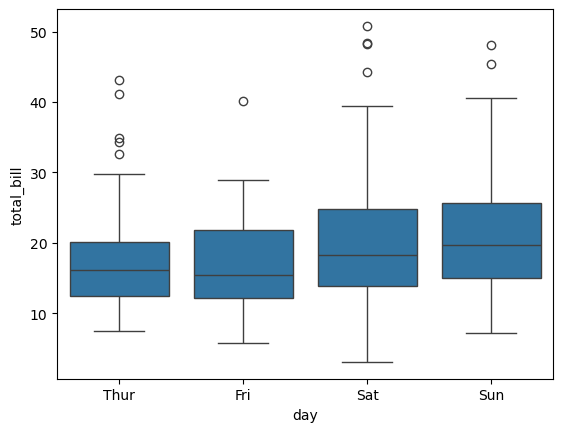

In [10]:
sns.boxplot(x='day',y='total_bill',data=tips)
plt.show()

/tmp/ipykernel_4045/3605990744.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_day, labels=days)


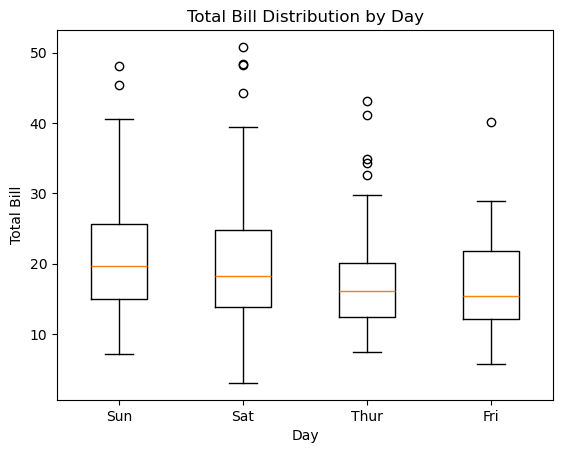

In [11]:
days = tips['day'].unique()

data_by_day = [
    tips[tips['day'] == day]['total_bill']
    for day in days
]

plt.boxplot(data_by_day, labels=days)
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Total Bill Distribution by Day')
plt.show()


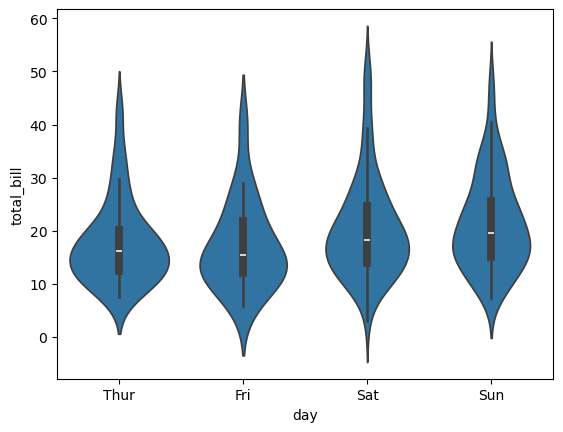

In [12]:
sns.violinplot(x='day',y='total_bill',data=tips)
plt.show()

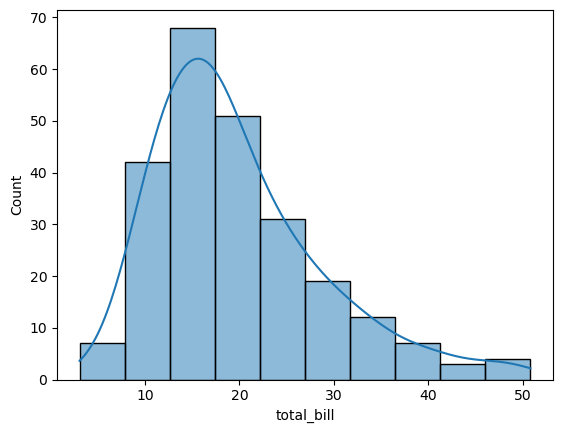

In [13]:
## histograms
sns.histplot(tips['total_bill'],bins=10,kde=True)
plt.show()

<Axes: xlabel='total_bill', ylabel='Density'>

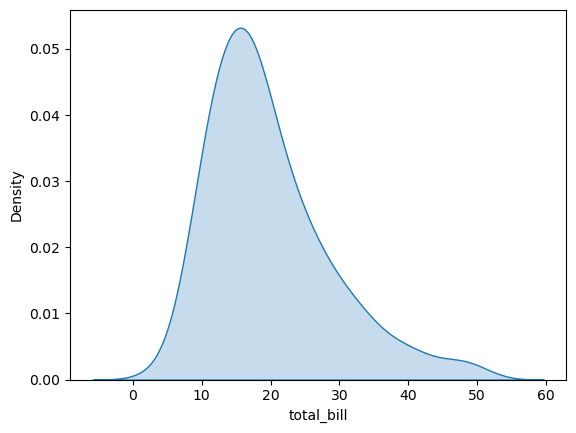

In [15]:
sns.kdeplot(tips['total_bill'],fill=True)

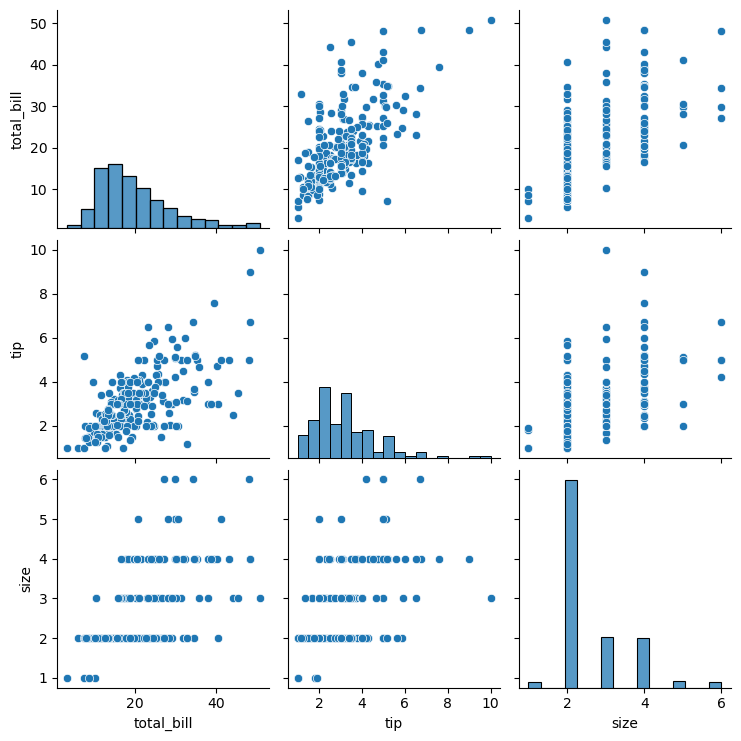

In [16]:
## Pairplot
sns.pairplot(tips)

In [18]:
## heatmap
corr = tips[['total_bill','tip','size']].corr()
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

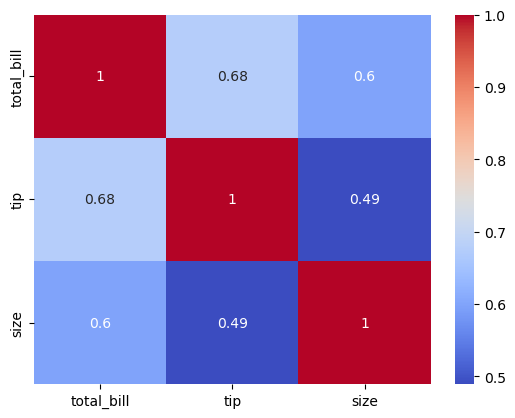

In [19]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [20]:
import pandas as pd
sales_df = pd.read_csv('sales_data.csv')
sales_df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


<Axes: xlabel='Product Category', ylabel='Total Revenue'>

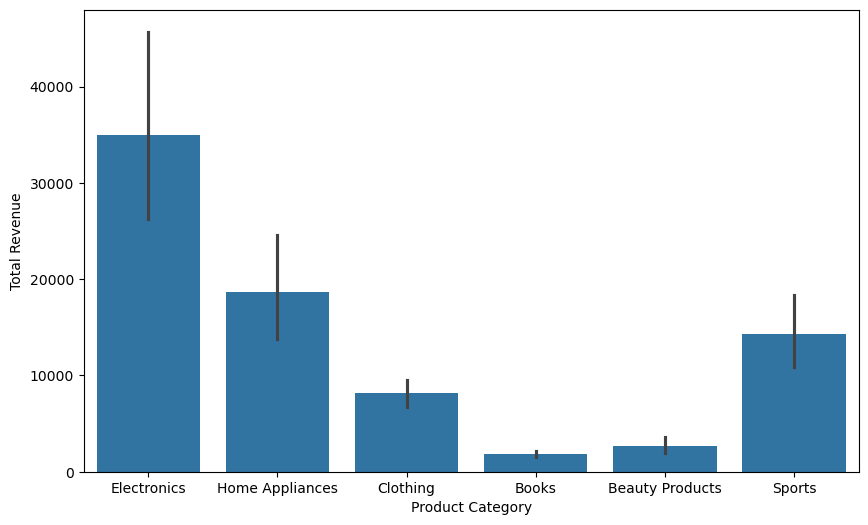

In [28]:
## plot total sales by product
plt.figure(figsize=(10,6))
sns.barplot(x='Product Category',y='Total Revenue',data=sales_df,estimator=sum)


In [29]:
summ = sales_df.groupby('Product Category')['Total Revenue'].sum()
summ


Product Category
Beauty Products     2621.90
Books               1861.93
Clothing            8128.93
Electronics        34982.41
Home Appliances    18646.16
Sports             14326.52
Name: Total Revenue, dtype: float64

<Axes: xlabel='Product Category', ylabel='Total Revenue'>

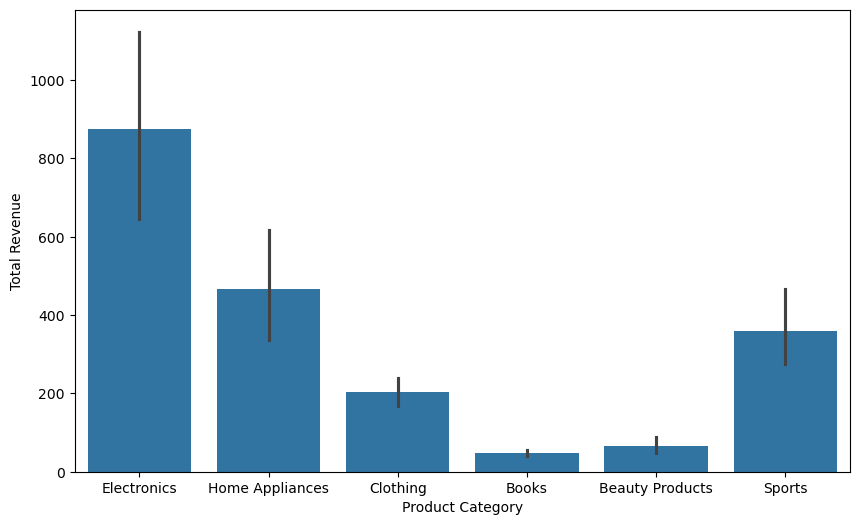

In [30]:

plt.figure(figsize=(10,6))
sns.barplot(x='Product Category',y='Total Revenue',data=sales_df)


In [31]:
mean = sales_df.groupby('Product Category')['Total Revenue'].mean()
mean

Product Category
Beauty Products     65.54750
Books               46.54825
Clothing           203.22325
Electronics        874.56025
Home Appliances    466.15400
Sports             358.16300
Name: Total Revenue, dtype: float64

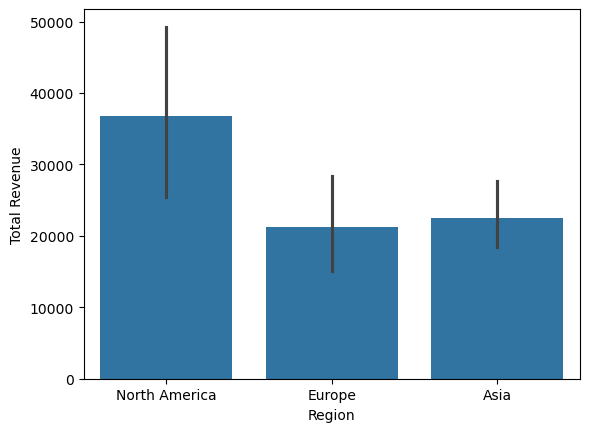

In [32]:
sns.barplot(x='Region',y='Total Revenue',estimator=sum,data=sales_df)
plt.show()

In [33]:
reg_sum = sales_df.groupby('Region')['Total Revenue'].sum()
reg_sum

Region
Asia             22455.45
Europe           21268.06
North America    36844.34
Name: Total Revenue, dtype: float64

<Axes: xlabel='Region'>

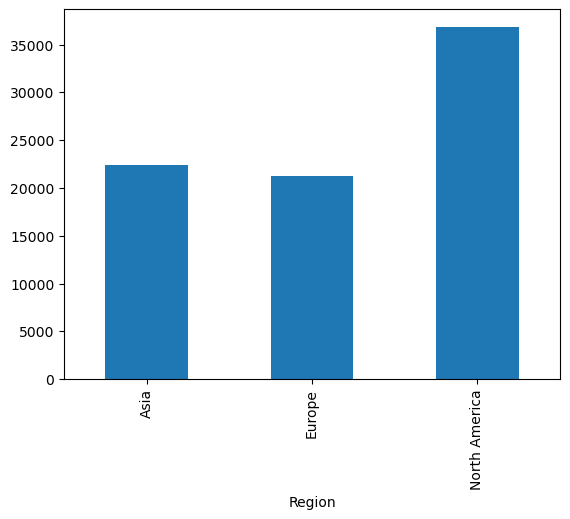

In [35]:
reg_sum.plot(kind='bar')